In [36]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

In [37]:
df=pd.read_csv('../datos/salarios_encoding_dum.csv', index_col=0)
df.head(2) #Hacemos una vista previa de nuestro DataFrame

,salary_box,experience_levelmap_funcion,emp_resid_CA,emp_resid_ES,emp_resid_FR,emp_resid_GB,emp_resid_IN,emp_resid_US
0,4631.904560,1,0,0,0,0,0,1
1,7311.922975,2,0,0,0,0,0,1


El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

- Deberéis separar la X y la y.
- Deberéis crear el train y el test.
- Ajustar vuestro modelo.

In [38]:
x = df.drop("salary_box", axis = 1) #Variables predictoras
y = df["salary_box"] #Variable respuesta

In [39]:
# Separamos nuestras variables en test y train.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [40]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos que usaremos de nuestro ordenador. 
# Al indicar -1 significa que los usaremos todos. 
lr = LinearRegression(n_jobs=-1)

In [41]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. 
# Fijaros que para que aprenda, les paso solo los datos de entrenamiento

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [42]:
# es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para los salarios a predecir
y_predict_test = lr.predict(x_test) # hacemos las predicciones para los salarios que tenemos en los datos de test

In [43]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
109,11171.498346,8478.305073,Train
247,6421.646998,7487.738739,Train
234,3677.054839,3665.571643,Train
202,4860.617969,4090.734704,Train
78,9727.326344,6497.172405,Train


In [44]:
# Vamos a sacar los residuos para verlo más claramente
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head(10) 

,Real,Predicted,Set,residuos
109,11171.498346,8478.305073,Train,2693.193273
247,6421.646998,7487.738739,Train,-1066.091741
234,3677.054839,3665.571643,Train,11.483197
202,4860.617969,4090.734704,Train,769.883265
78,9727.326344,6497.172405,Train,3230.153939
147,8533.395515,7487.738739,Train,1045.656775
59,2674.723649,2240.411112,Train,434.312537
118,5460.900086,7487.738739,Train,-2026.838653
6,3385.268560,4022.695527,Train,-637.426966
182,5801.135240,4952.598382,Train,848.536858


En vista de los primeros resultados tenemos unos residuos importantes en nuestro modelo, tanto sobreestimado como infraestimado. Veamos graficamente nuestro modelo pero podemos intuir que va a mal.

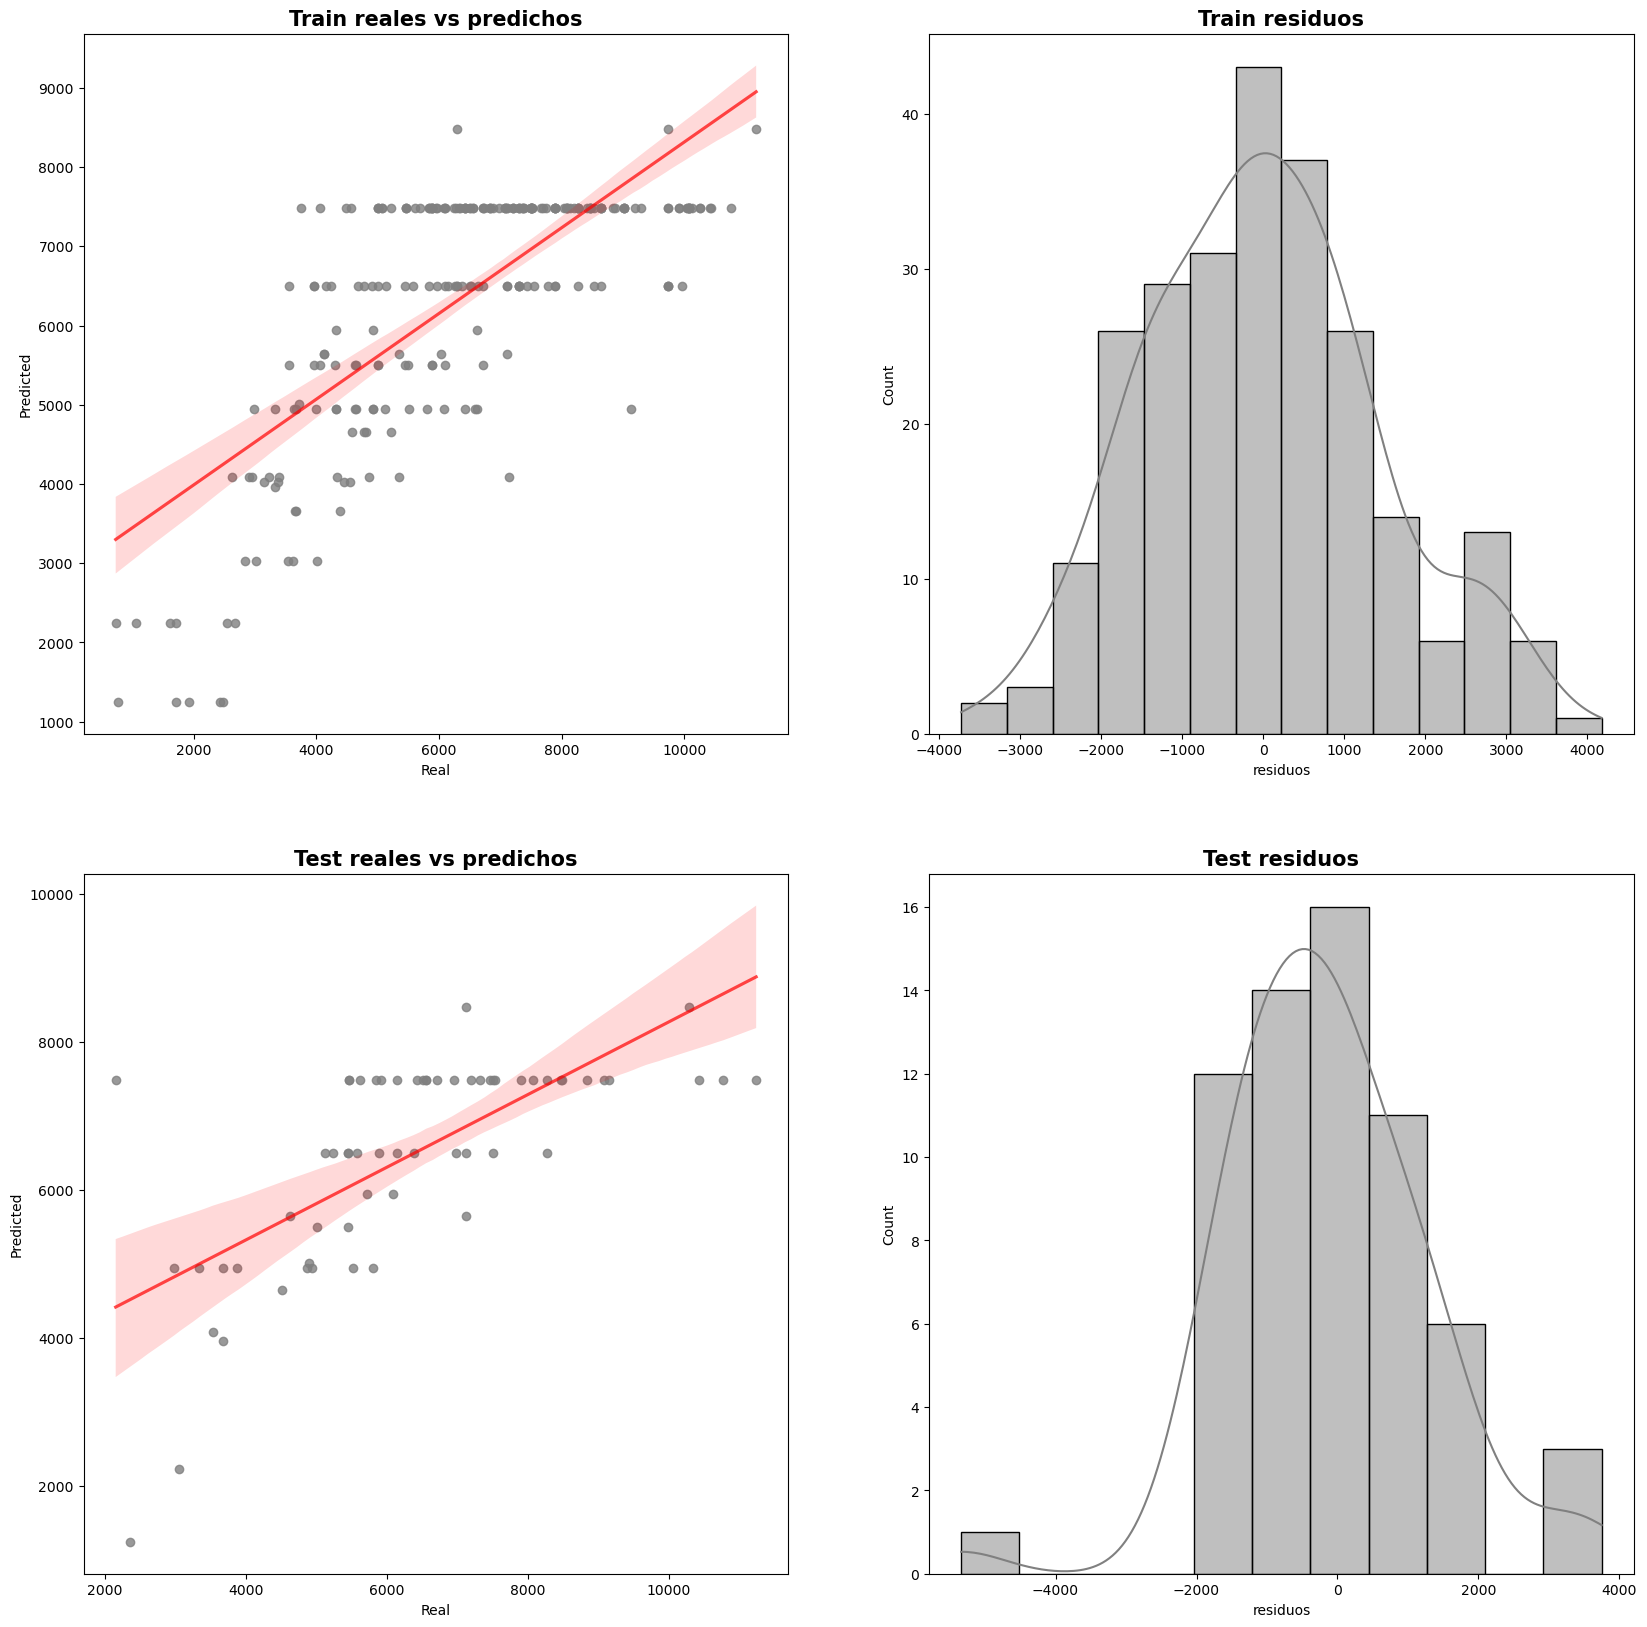

In [45]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

Efectivamente como sospechabamos nuestros datos no presentan una estructura lineal, sino que vemos franjas muy marcadas como si de categorias se tratara, recordemos que nuestra variable a predecir son salarios. Aunque nuestros datos han cumplido todas las asunciones, este modelo no se adecue a nuestros datos.

## Metricas

In [46]:
# Para el conjunto de entrenamsiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.541285284013261
El MAE es 1152.5791679819936
El MSE es 2117209.872674037
EL RMSE es  1455.0635287416274
Para el conjunto test:---------------
El valor de r2 score es  0.476543315405094
El MAE es 1074.127184322865
El MSE es 2045892.4555392375
EL RMSE es  1430.3469703324565


In [47]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,1074.127184,2.045892e+06,1430.346970,0.476543,test,Linear Regresion
1,1152.579168,2.117210e+06,1455.063529,0.541285,train,LinearRegression


In [48]:
# vamos a guardar este csv para usarlo en próximas lecciones

df_resultados.to_csv("../datos/resultados_salarys.csv")